### Perception in Robotics 2022
Problem Set 1, Maxim Kurkin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from tqdm.notebook import tqdm

## Task 1

- A. (5 pts) Plot the probabbility density function $p(x)$ of one-dimensional Gaussian ditribution $\mathcal N (x;\; 1, 1)$

In [2]:
from scipy.stats import norm

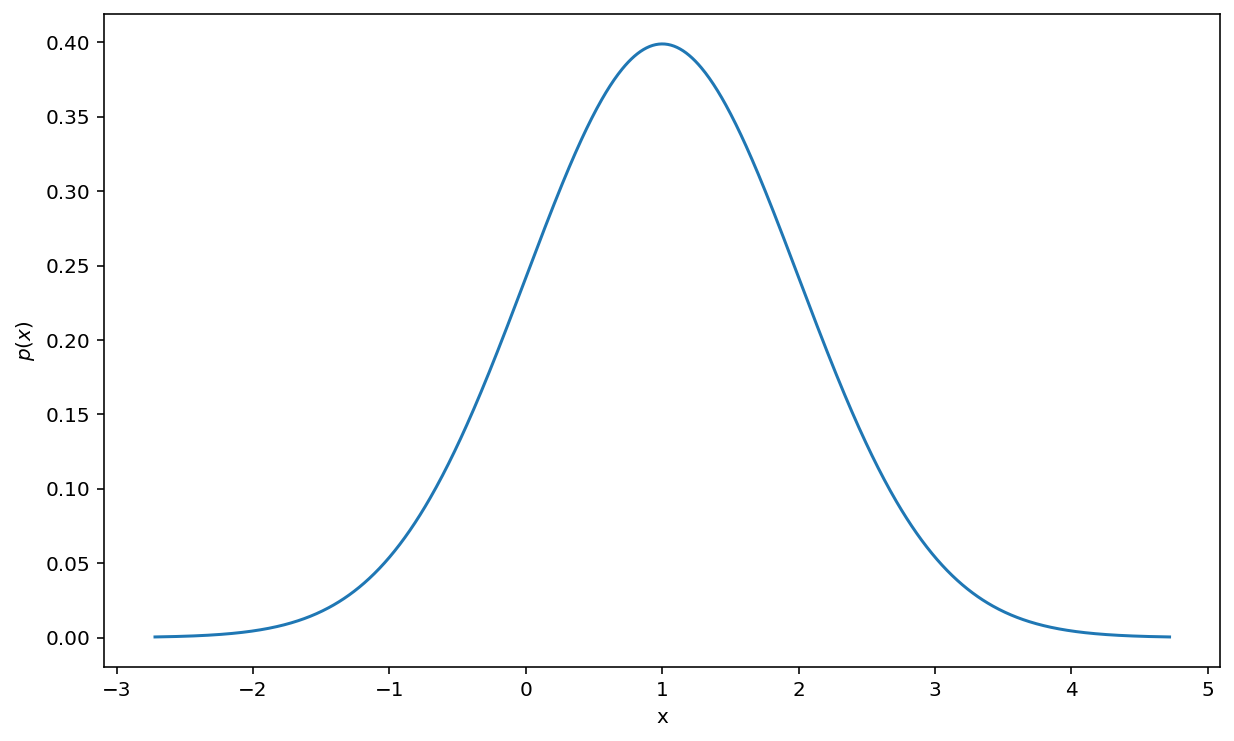

In [3]:
mu = 1
sigma = 1
n = 1000
perc = 1e-4
x = np.linspace(norm.ppf(perc, mu, sigma), norm.ppf(1 - perc, mu, sigma), n)
plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.plot(x, norm.pdf(x, mu, sigma));

- B. (5 pts) Calculate the probability mass that the random variable $X$ is less than $0$, that is, $Pr\{X \leq 0\}=\int_{-\infty}^0p(x)dx$.

We need to calculate how much mass of distribution is contained in its left tail, at $x \leq0$:

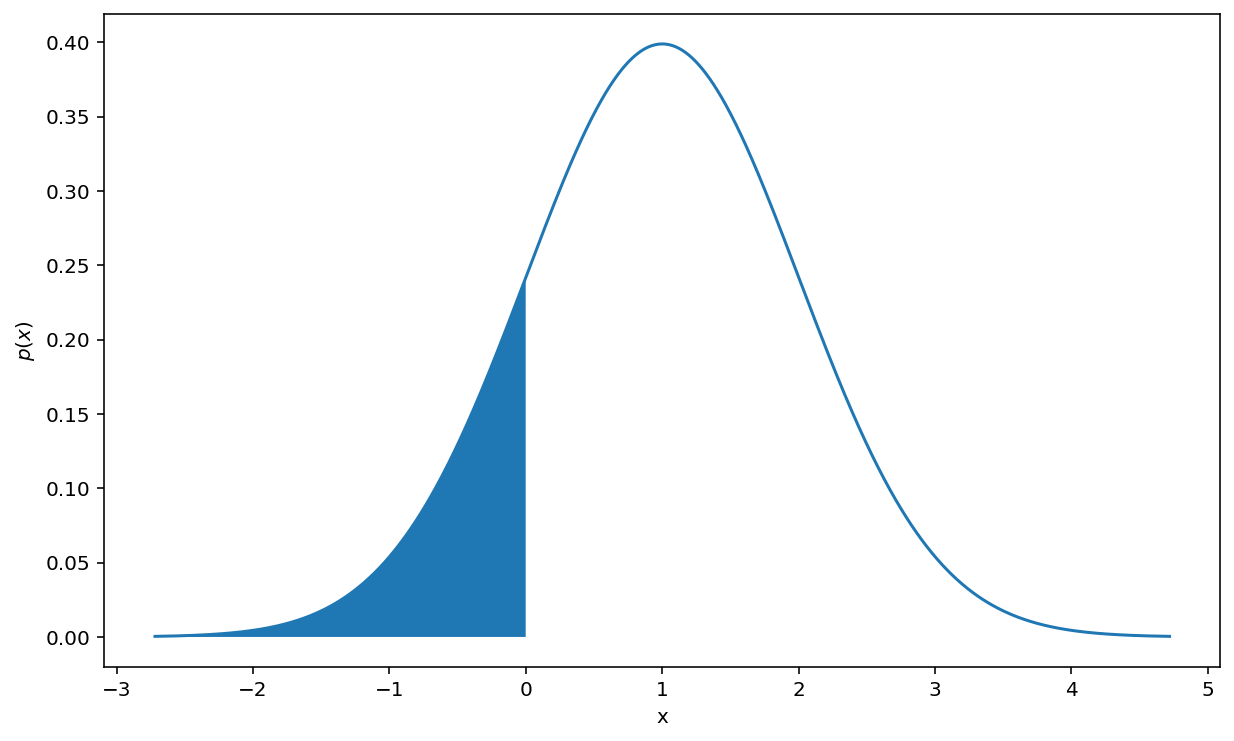

In [4]:
plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.plot(x, norm.pdf(x, mu, sigma))
plt.fill_between(x[x <= 0], norm.pdf(x[x <= 0], mu, sigma));

In [5]:
norm.cdf([0], mu, sigma)[0]

0.15865525393145707

- C. (15 pts) Consider the new observation variable $z$, it gives information about the variable $x$ by the likelihood function $p(z|x) = \mathcal N(z;x,\sigma_2)$, with variance $\sigma_2 = 0.2$. Apply the Bayes’ theorem to derive the posterior distribution, $p(x|z)$, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior distribution, $p(x)$, too.     
$$p(x|z)=\frac{p(z|x)p(x)}{p(z)},\: p(z)=\int_\mathbb{R}p(x,z)dx \text { (marginalization of joint distribution)}$$

In [6]:
from scipy import integrate

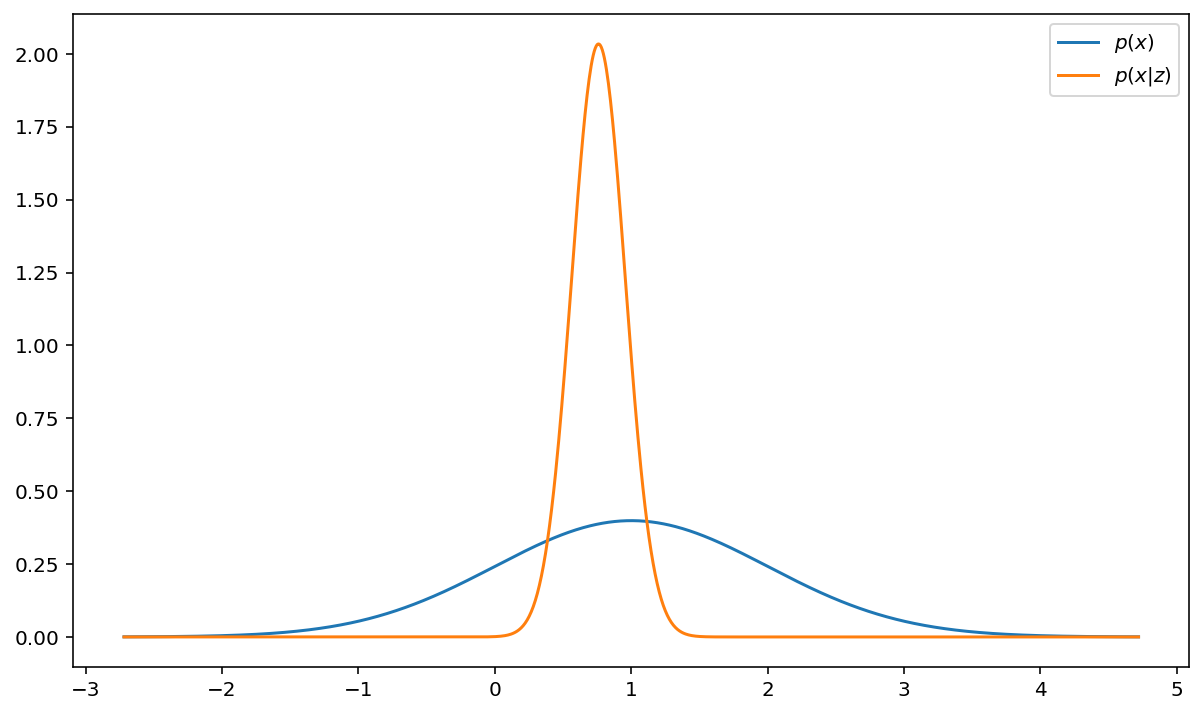

In [7]:
sigma_2 = 0.2
z = 0.75
p_x  = norm.pdf(x, mu, sigma)
p_z  = norm.pdf(x, z, sigma_2)
p_zx = norm.pdf(z, x, sigma_2)
p_xz = p_zx * p_x
p_xz /= integrate.simps(p_x * p_z, x)
plt.figure(figsize=(10,6))
plt.plot(x, p_x,  label='$p(x)$')
plt.plot(x, p_xz, label='$p(x|z)$')
plt.legend();

We also can marginalize with another integral: 
$$\int p(x,z)dx=\int p(z|x)p(z)dx=p(z)\int p(z|x)dx$$

difference: 0.0


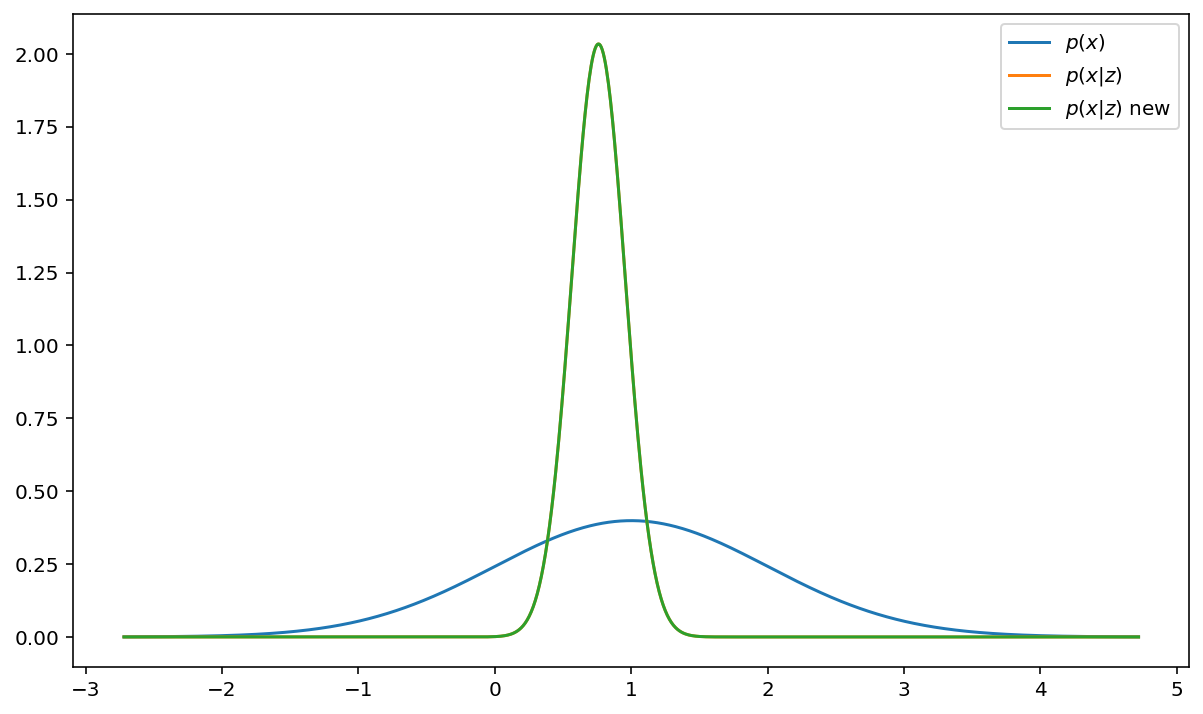

In [8]:
p_xz_new = p_zx * p_x
p_xz_new /= integrate.simps(p_xz_new, x)
plt.figure(figsize=(10,6))
plt.plot(x, p_x,  label='$p(x)$')
plt.plot(x, p_xz, label='$p(x|z)$')
plt.plot(x, p_xz_new, label='$p(x|z)$ new')
print(f'difference: {np.linalg.norm(p_xz - p_xz_new)}')
plt.legend();

## Task 2

- A. (10 pts) Write the function plot2dcov which plots the 2d contour given three core parameters: mean, covariance, and the iso-contour value k. You may add any other parameter such as color, number of points, etc.

In [9]:
from scipy.linalg import cholesky, svd

In [10]:
from scipy.stats import random_correlation

In [11]:
def plot2cov(mean, cov, k=1, ax=None, label='', mode='cholesky', s=0.5, x=None, n_pts=30):
    if mode == 'cholesky':
        L = cholesky(cov, lower=True)
    elif mode == 'svd':
        U, S, _ = svd(cov)
        L = U @ (np.sqrt(S) * np.eye(S.size))
    if x is None:
        theta = np.linspace(0, 2 * np.pi, n_pts)
        x = k * np.vstack((np.cos(theta), np.sin(theta)))
    if ax is None:
        fig, ax = plt.subplots()
    points = L @ x + np.array(mean)[:, np.newaxis]
    ax.scatter(points[0], points[1], label=label, s=s)
    ax.grid()
    return points

In [12]:
means = [[0, 0], [5, 0], [2, 2]]
covs  = [[[1, 0], [0, 2]], [[3, -0.4], [-0.4, 2]], [[9.1, 6], [6, 4]]]
ks = [1, 2, 3]

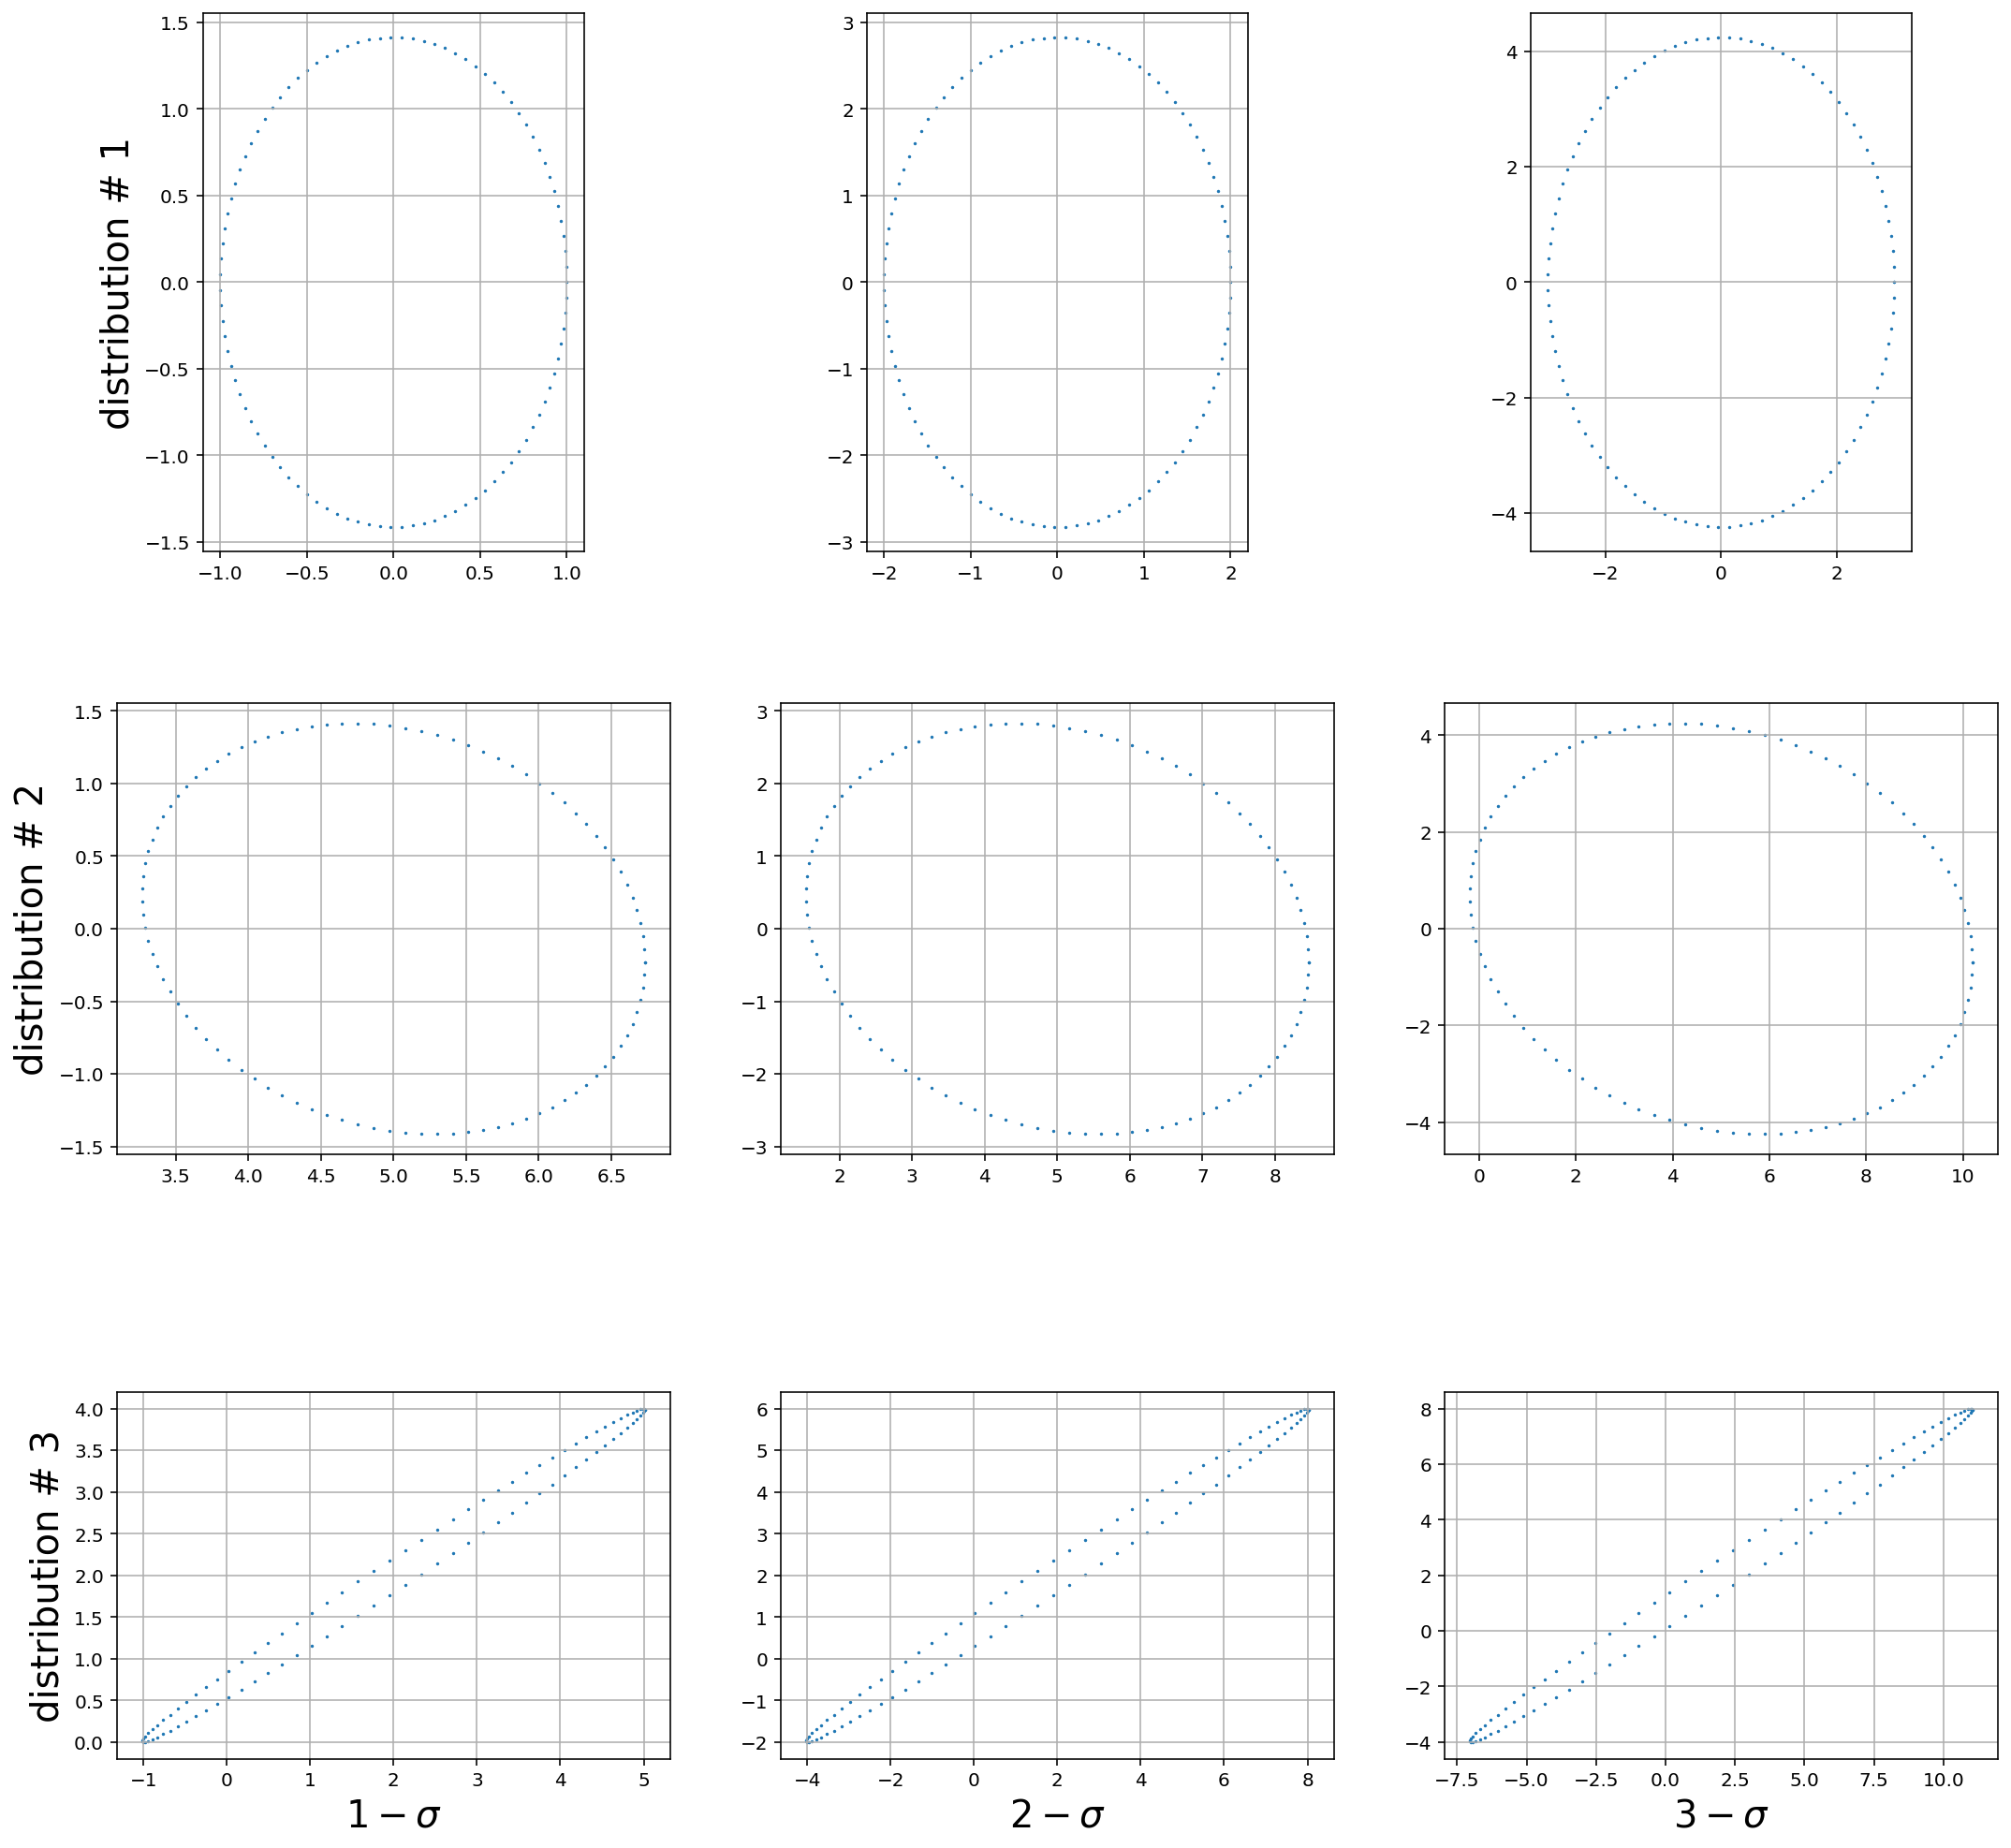

In [13]:
fig, axes2d = plt.subplots(nrows=len(covs), ncols=len(ks),
                           figsize=(18,18))

for i, row in enumerate(axes2d): 
    for j, cell in enumerate(row):
        cell.set_aspect('equal')
        points = plot2cov(means[i], covs[i], ks[j], cell, n_pts=100)
        if i == len(axes2d) - 1:
            cell.set_xlabel(f"${ks[j]}-\sigma$", fontsize=20)
        if j == 0:
            cell.set_ylabel(f"distribution # {i + 1}", fontsize=20)
plt.show()

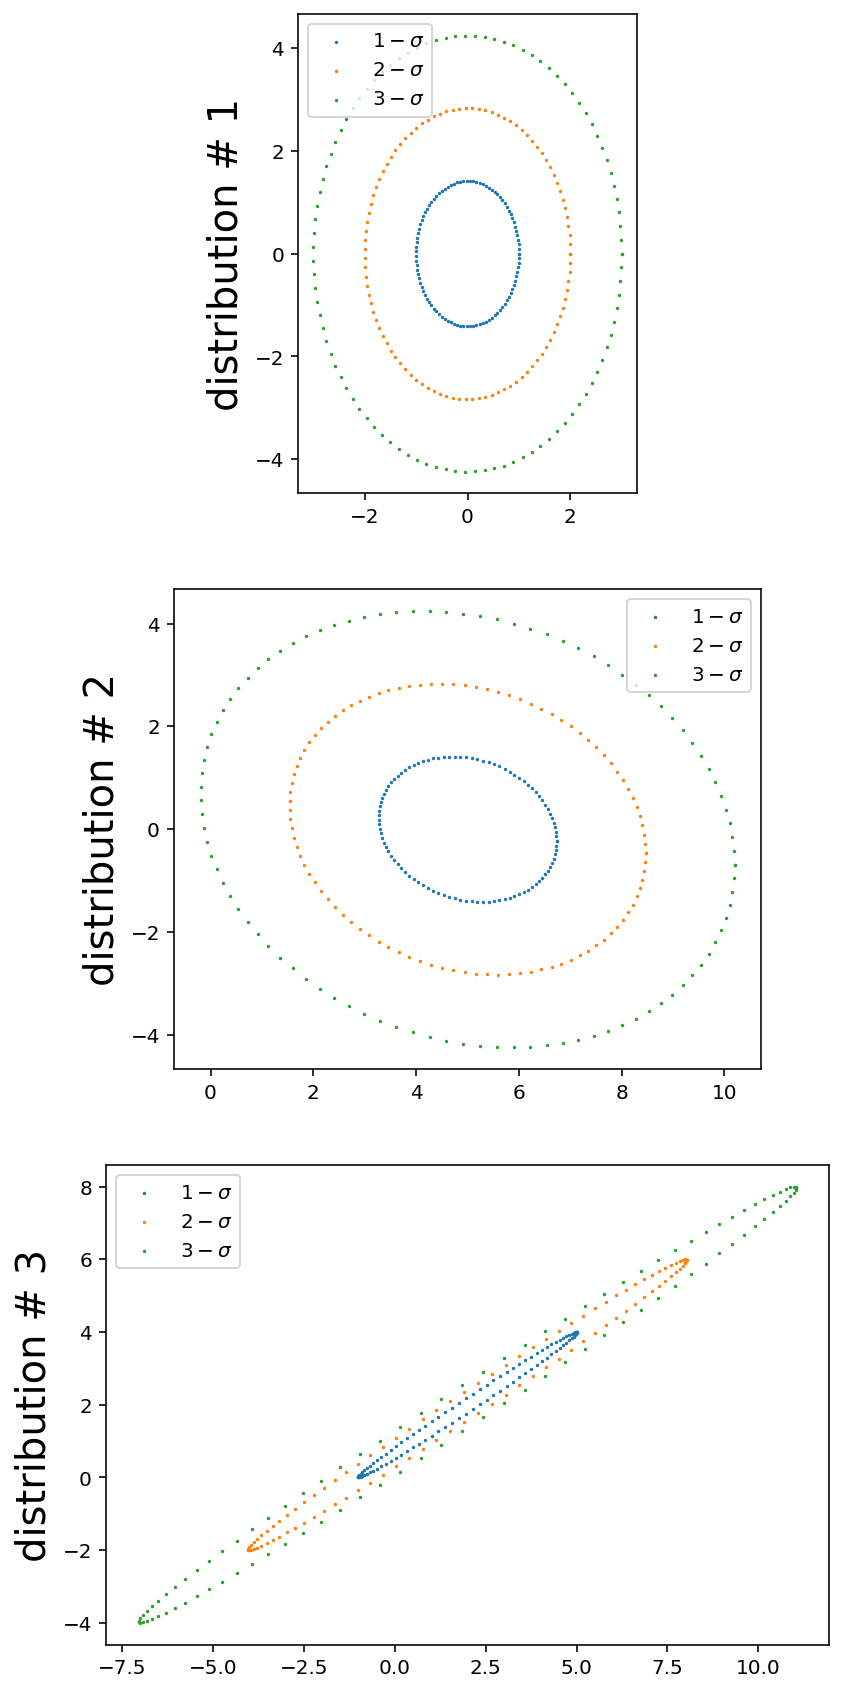

In [14]:
fig, axes2d = plt.subplots(nrows=len(covs), ncols=1, figsize=(9,15))
for i, row in enumerate(axes2d):
    row.set_aspect('equal')
    for k in ks:
        points = plot2cov(means[i], covs[i], k, row, label=f"${k}-\sigma$", n_pts=100)
    row.legend()
    row.grid()
    row.set_ylabel(f"distribution # {i + 1}", fontsize=20)
plt.show()

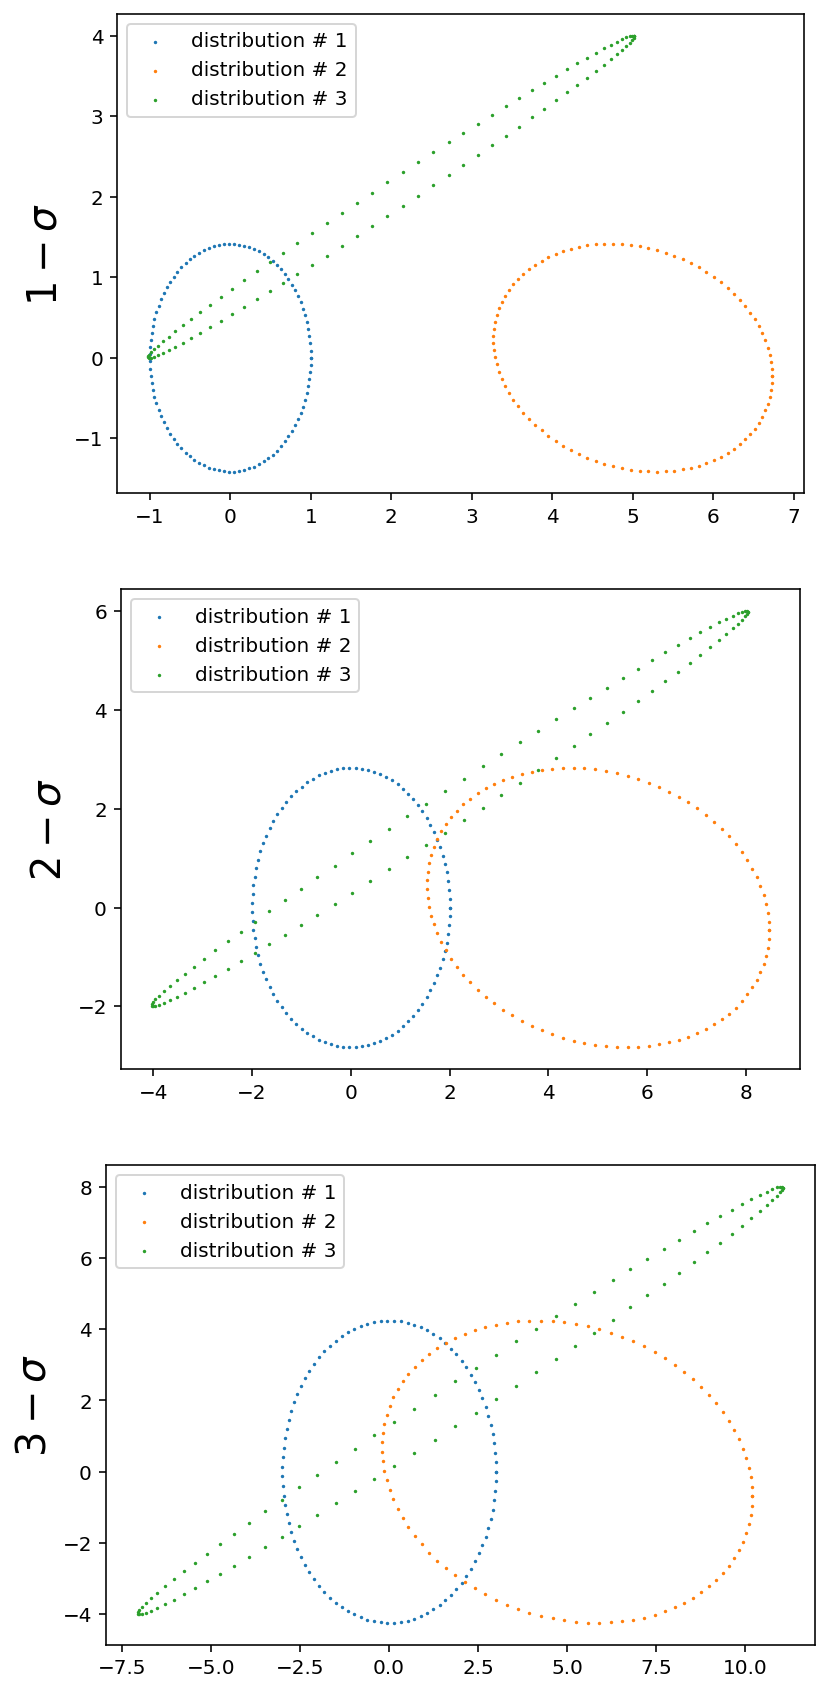

In [15]:
fig, axes2d = plt.subplots(nrows=len(ks), ncols=1, figsize=(9,15))
for i, row in enumerate(axes2d):
    row.set_aspect('equal')
    for j in range(len(covs)):
        points = plot2cov(means[j], covs[j], ks[i], row, label=f"distribution # {j + 1}", n_pts=100)
    row.legend()
    row.grid()
    row.set_ylabel(f"${ks[i]}-\sigma$", fontsize=20)
plt.show()

Observations on distributions:
1. $x$ and $y$ are uncorrelated. Auto-variance of $y$ is higher ($\sigma_{xx}<\sigma_{yy}$) $\Rightarrow$ ellipsoid stretched along $y$
2. $x$ and $y$ are negatively correlated, isocontours remind of $x+\alpha y=c, \alpha>0$. Auto-variance of $y$ is lower ($\sigma_{xx}>\sigma_{yy}$) $\Rightarrow$ ellipsoid stretched along $x$
3. $x$ and $y$ are positively correlated, isocontours remind of $x+\alpha y=c, \alpha<0$. Auto-variance of $y$ is lower ($\sigma_{xx}>\sigma_{yy}$) $\Rightarrow$ ellipsoid stretched along $x$. Cross-covariances $\sigma_{xy},\sigma_{yx}$ are higher in magnitude than in second distribution $\Rightarrow$ more flattened ellipsoid

- B. (5 pts) Write the equation of sample mean and sample covariance of a set of points ${x_i}$, in vector form as was shown during the lecture. You can provide your solution by using Markdown, latex, by hand, etc.


Sample is $x_i \in \mathbb{R}^M, 1 \leq i \leq N$ - $N$ vectors of length $M$    
Sample mean: 
$$\overline{x}=\frac{1}{N}\sum^{N}_{i=1} x_i = 
\frac{1}{N}\left(\begin{matrix}{\sum_{i=1}^N x^1_i \\ ... \\ \sum_{i=1}^N x^k_i \\ ...\\ \sum_{i=1}^N x^M_i}\end{matrix}\right)$$  
Sample covariance: 
$$\overline{\Sigma}_{x} = \frac{1}{N-1}\sum^{N}_{i=1} (x_i - \overline{x})(x_i - \overline{x})^{\top}$$

- C. (10 pts) Draw random samples from a multivariate normal distribution.

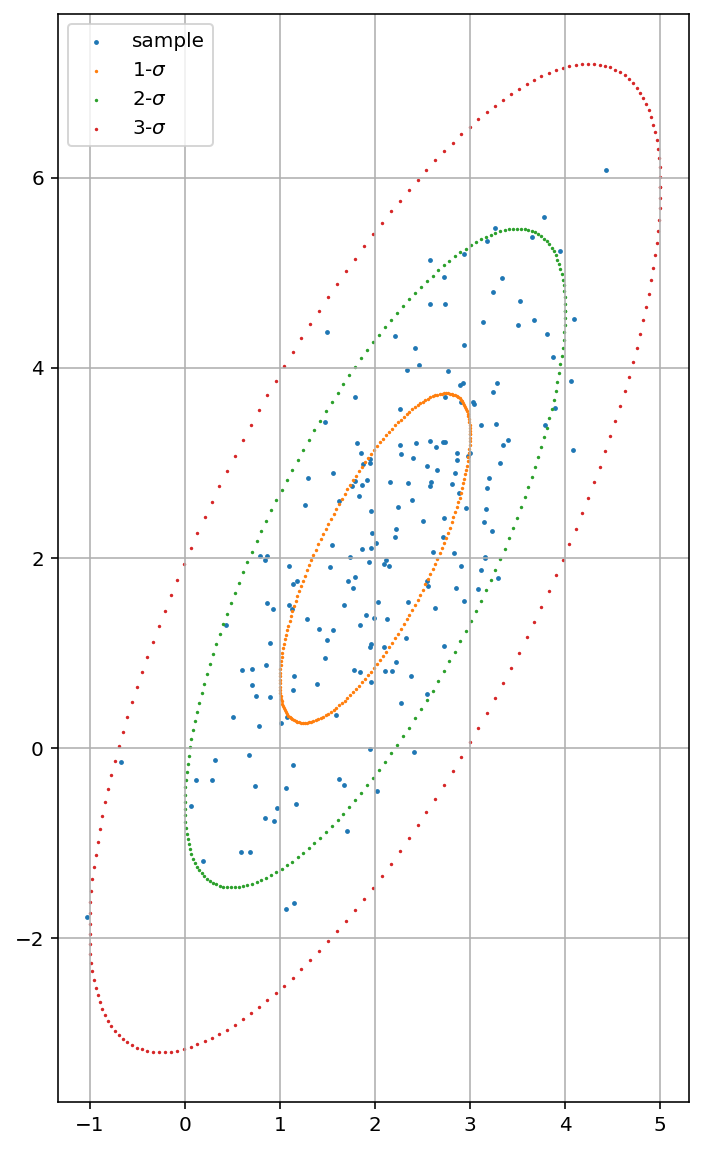

In [16]:
mean = [2, 2]
cov = [[1, 1.3], [1.3, 3]]
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
sample_points = plot2cov(mean, cov, ax=ax, label='sample', s=2, x=np.random.randn(2, 200))
for k in ks:
    plot2cov(mean, cov, k=k, ax=ax, label=f'{k}-$\sigma$', n_pts=200)
plt.grid()
plt.legend();

In [17]:
sample_mean = sample_points.mean(axis=1)
sample_cov = np.cov(sample_points)
print(f"sample mean: {sample_mean}, theoretical mean: {mean}, error: {np.linalg.norm(sample_mean - mean):.3f}")
print(f"sample covariance: {sample_cov},\n theoretical covariance: {cov}, error: {np.linalg.norm(sample_cov - cov):.3f}")

sample mean: [2.12729841 2.1356109 ], theoretical mean: [2, 2], error: 0.186
sample covariance: [[0.95631897 1.17416185]
 [1.17416185 2.64953888]],
 theoretical covariance: [[1, 1.3], [1.3, 3]], error: 0.395


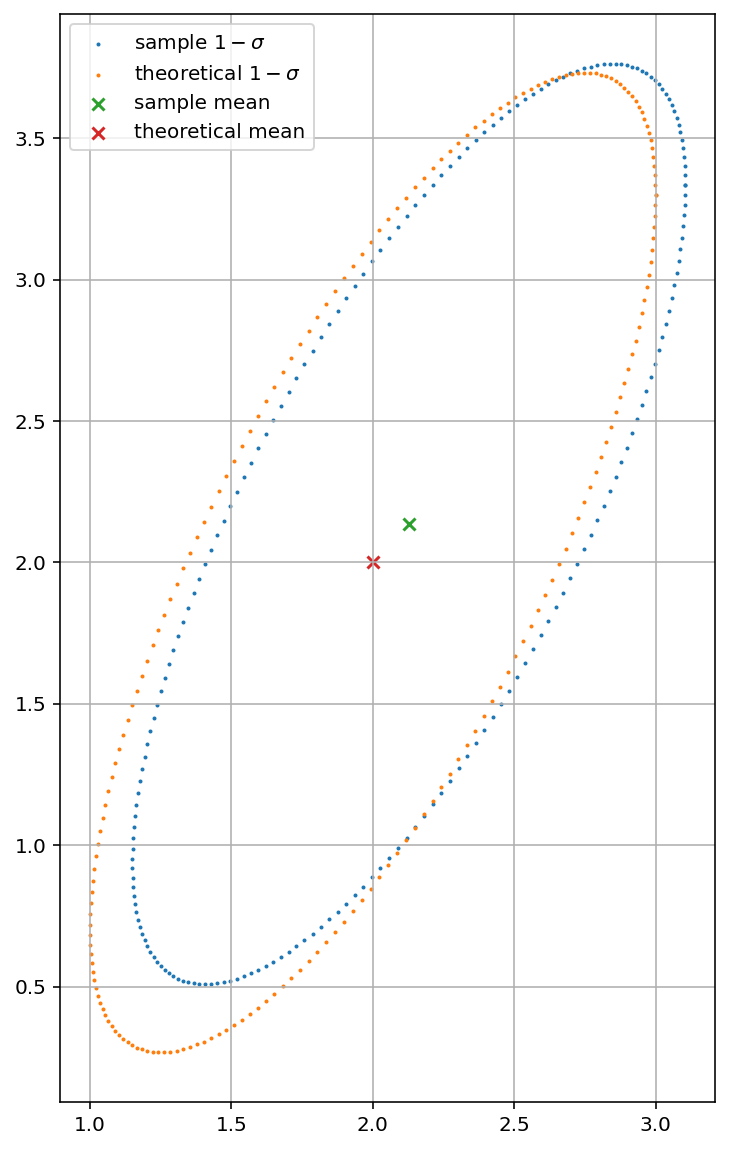

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')

estimated_points = plot2cov(sample_mean, sample_cov, ax=ax, label='sample $1-\sigma$', s=1, n_pts=200)
theoretical_points = plot2cov(mean, cov, ax=ax, label='theoretical $1-\sigma$', s=1, n_pts=200)
ax.scatter(sample_mean[0], sample_mean[1], marker='x', label='sample mean')
ax.scatter(mean[0], mean[1], marker='x', label='theoretical mean')
plt.grid()
plt.legend();

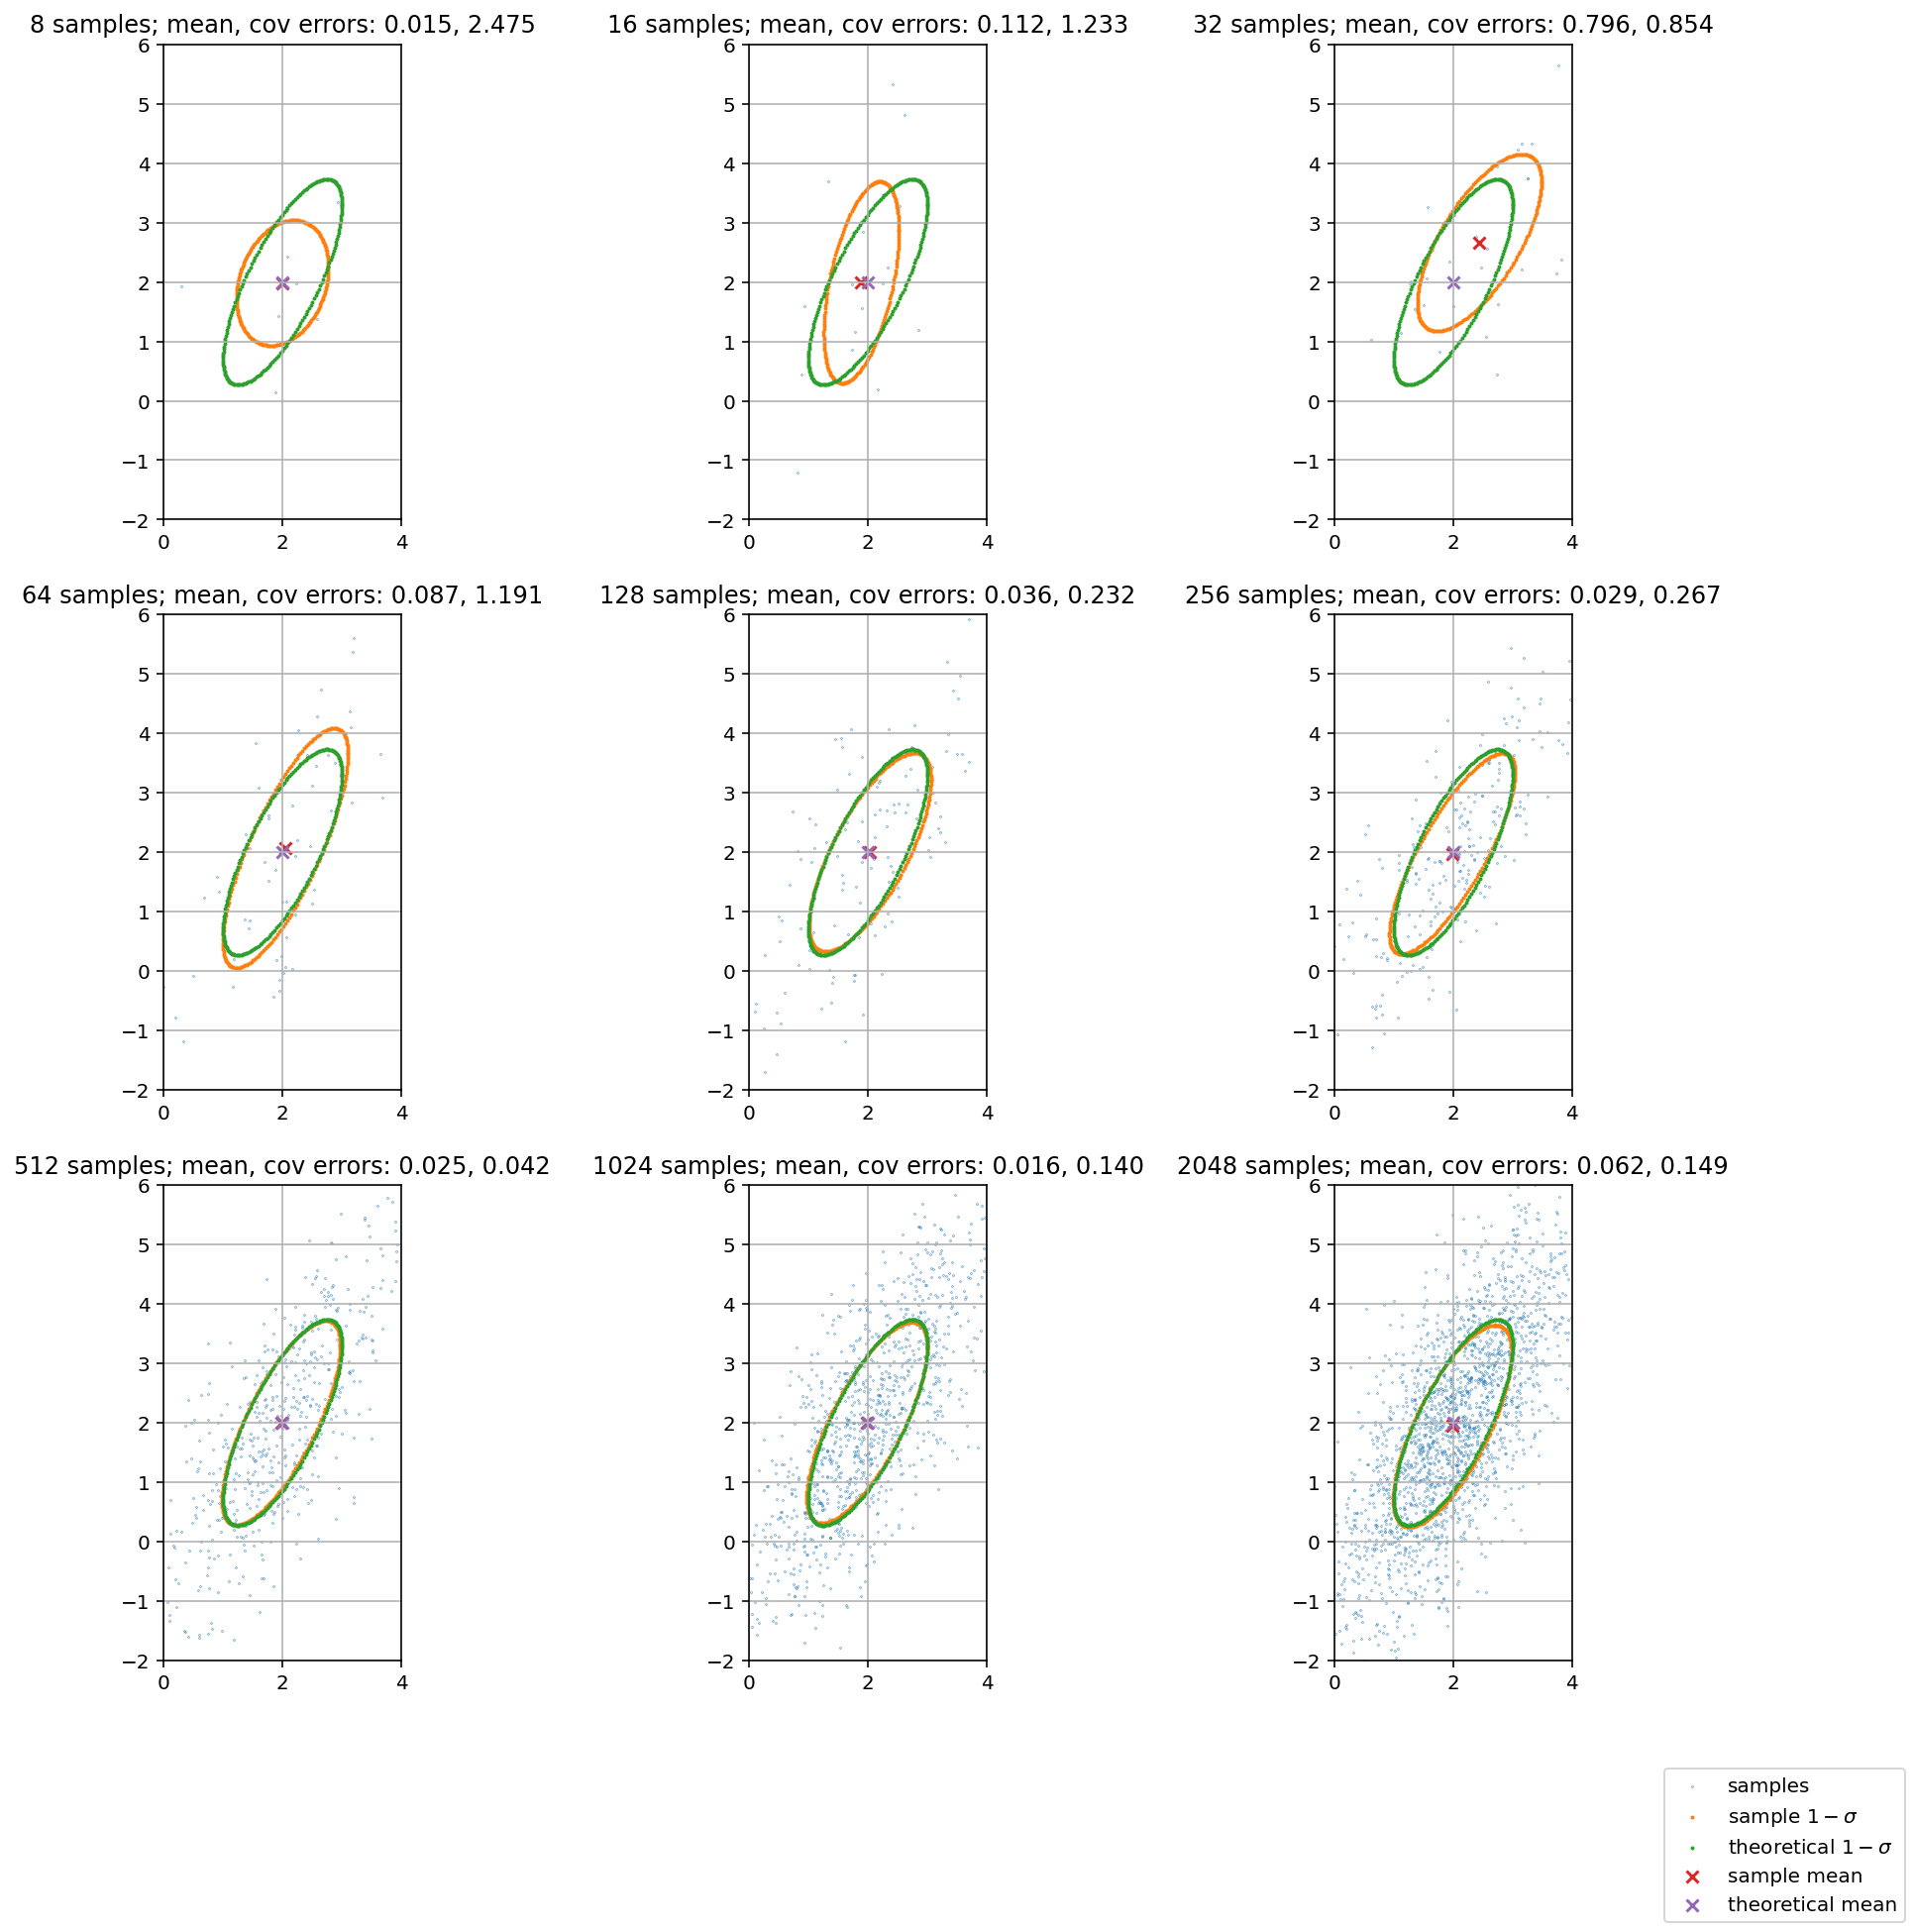

In [19]:
mean = [2, 2]
cov = [[1, 1.3], [1.3, 3]]
sizes = [2 ** i for i in range(3, 12)]
fig, axes2d = plt.subplots(nrows=3, ncols=3,
                           #sharex=True, sharey=True,
                           figsize=(15,15))

for i, row in enumerate(axes2d): 
    for j, cell in enumerate(row):
        size = int(sizes[3 * i + j])
        cell.set_aspect('equal')
        cell.set_xlim([0, 4])
        cell.set_ylim([-2, 6])
        sample_points = plot2cov(mean, cov, ax=cell, label='samples', s=0.05, x=np.random.randn(2, size))
        sample_mean = sample_points.mean(axis=1)
        sample_cov = np.cov(sample_points)
        estimated_points = plot2cov(sample_mean, sample_cov, ax=cell, label='sample $1-\sigma$', s=1, n_pts=200)
        theoretical_points = plot2cov(mean, cov, ax=cell, label='theoretical $1-\sigma$', s=1, n_pts=200)
        cell.scatter(sample_mean[0], sample_mean[1], marker='x', label='sample mean')
        cell.scatter(mean[0], mean[1], marker='x', label='theoretical mean')
        mean_err = np.linalg.norm(sample_mean - mean)
        cov_err  = np.linalg.norm(sample_cov - cov)
        cell.set_title(f"{size} samples; mean, cov errors: {mean_err:.3f}, {cov_err:.3f}")
        handles, labels = cell.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right');

We observe illustration of law of large numbers: the larger the sample size, the more unbiased estimation of mean we get and the more empirical PDF resembles theoretical PDF.

## Task 3

- A. (5 pts) Write the equations corresponding to the mean and covariance after a single propagation of the holonomic platform. How can we use this result iteratively?      
Let's derive expectation of position vector $[x,y]^\top_t$. $[v_x, v_y]^\top_t=const$ as they are commanded:    

$$
\left[\begin{matrix} x \\ y \end{matrix}\right]_{t}=
\left[\begin{matrix} 1 & 0 \\0 & 1 \end{matrix}\right]
\left[\begin{matrix} x \\ y \end{matrix}\right]_{t-1}+
\left[\begin{matrix} \Delta t & 0 \\ 0 & \Delta t\end{matrix}\right]
\left[\begin{matrix} v_{x} \\ v_{y}\end{matrix}\right]_{t}+
\left[\begin{matrix} \eta_{x} \\ \eta_{y} \end{matrix}\right]_{t}=
$$
$$
A
\left[\begin{matrix} x \\ y \end{matrix}\right]_{t-1}+
B
\left[\begin{matrix} v_{x} \\ v_{y}\end{matrix}\right]_{t}+
\left[\begin{matrix} \eta_{x} \\ \eta_{y} \end{matrix}\right]_{t} \Rightarrow
$$
$$ \Rightarrow
\mathbb{E}\left\{\left[\begin{matrix} x \\ y \end{matrix}\right]_{t}\right\}=
A\mathbb{E}\left\{\left[\begin{matrix} x \\ y \end{matrix}\right]_{t-1}\right\}+
B\mathbb{E}\left\{\left[\begin{matrix} v_{x} \\ v_{y}\end{matrix}\right]_{t}\right\}+
\mathbb{E}\left\{\left[\begin{matrix} \eta_{x} \\ \eta_{y} \end{matrix}\right]_{t}\right\};
$$

$$
\Sigma_{t}=\mathbb{E}
\left\{
\left(\left[\begin{matrix} x \\ y \end{matrix}\right]_{t}-\mu_t\right)
\left(\left[\begin{matrix} x \\ y \end{matrix}\right]_{t}-\mu_t\right)^\top
\right\} = \text{ (linearity of expectation)} = 
$$

$$
= A\mathbb{E}
\left\{ 
\left(\left[\begin{matrix} x \\ y \end{matrix}\right]_{t-1}-\mu_{t-1}\right)
\left(\left[\begin{matrix} x \\ y \end{matrix}\right]_{t-1}-\mu_{t-1}\right)^\top
\right\}
A^\top+
\mathbb{E}\left\{(\eta_t-\mu_\eta)( \eta_t-\mu_\eta)\top\right\}=
A\Sigma_{t-1}
A^\top+
\mathbb{E}\left\{(\eta_t-\mu_\eta)( \eta_t-\mu_\eta)^\top\right\}
$$

We can recursively obtain expected position of a platform at step $t$ calculating it with the same formula and $t^\prime=t-1$, assuming at $t=0$ we have some initial state $[x,y]^\top_0$. Thus,

$$\mu_{t+1}=A \mu_t+Bu_t+\mu_\eta;\:\Sigma_{t+1}=A\Sigma_tA^\top+\Sigma_{\eta}$$

- B. (5 pts) Draw the propagation state PDF (1-sigma iso-contour) for times indexes $t = 0, . . . , 5$ and the control sequence $u_t = [3, 0]^\top$ for all times $t$.

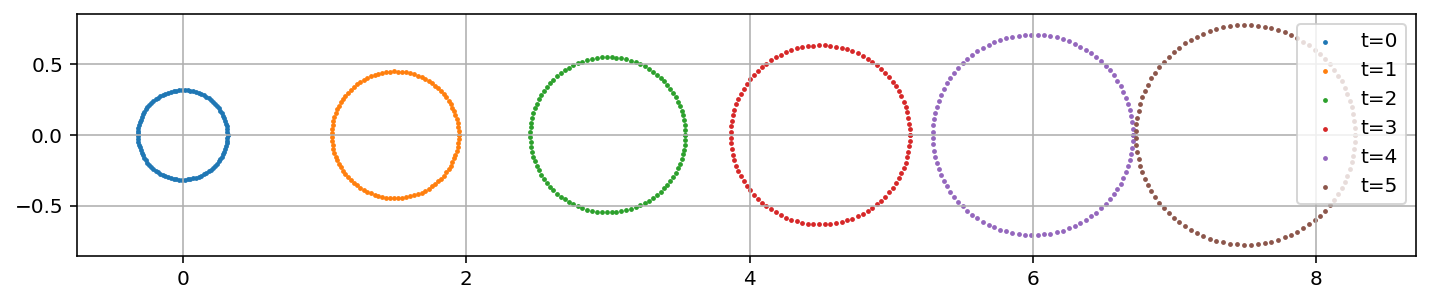

In [20]:
mean = [0, 0]
cov = [[0.1, 0], [0, 0.1]]
mean_noise = [0, 0]
cov_noise = [[0.1, 0], [0, 0.1]]
u = [3, 0]

delta = 0.5
A = np.eye(2)
B = delta * np.eye(2)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')
for t in range(6):
    plot2cov(mean, cov, ax=ax, label=f't={t}', k=1, s=2, n_pts=100)
    mean = A @ mean + B @ u + mean_noise
    cov  = A @ cov @ A.T + cov_noise
plt.grid()
plt.legend();

- C. (5 pts) Somehow, the platform is malfunctioning; thus, it is moving strangely and its propagation model has changed. All the other parameters and controls are the same as defined earlier. Draw the propagation state PDF (1-sigma iso-contour and 500 particles) for times indexes $t = 0, . . . , 5$.

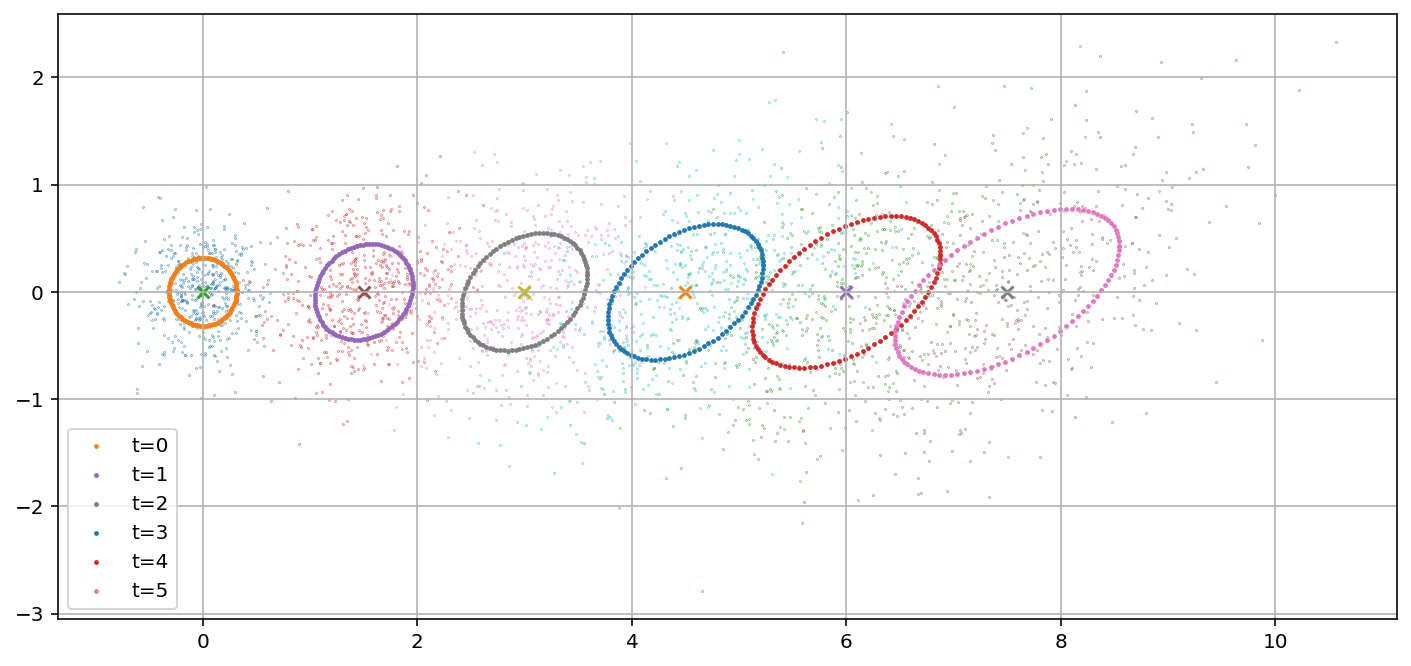

In [21]:
mean = [0, 0]
cov = [[0.1, 0], [0, 0.1]]
mean_noise = [0, 0]
cov_noise = [[0.1, 0], [0, 0.1]]
u = [3, 0]

delta = 0.5
A = np.array([[1, 0.3], [0, 1]])
B = delta * np.eye(2)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')
for t in range(6):
    plot2cov(mean, cov, ax=ax, s=0.05, x=np.random.randn(2, 500))
    plot2cov(mean, cov, ax=ax, label=f't={t}', k=1, s=2, n_pts=100)
    ax.scatter(mean[0], mean[1], marker='x')
    mean = A @ mean + B @ u + mean_noise
    cov  = A @ cov @ A.T + cov_noise
plt.grid()
plt.legend();

Linearization: 

$$
\vec{x_t} \approx f(\vec{x_{t-1}}, \mu_t)=f(\mu_{t-1}, \mu_t) + J(\vec{x_{t-1}}-\mu_t)$$
Jacobian:
$$
\left[\frac{\partial f}{\partial x}  \frac{\partial f}{\partial y}  \frac{\partial f}{\partial \theta}\right]=J
$$

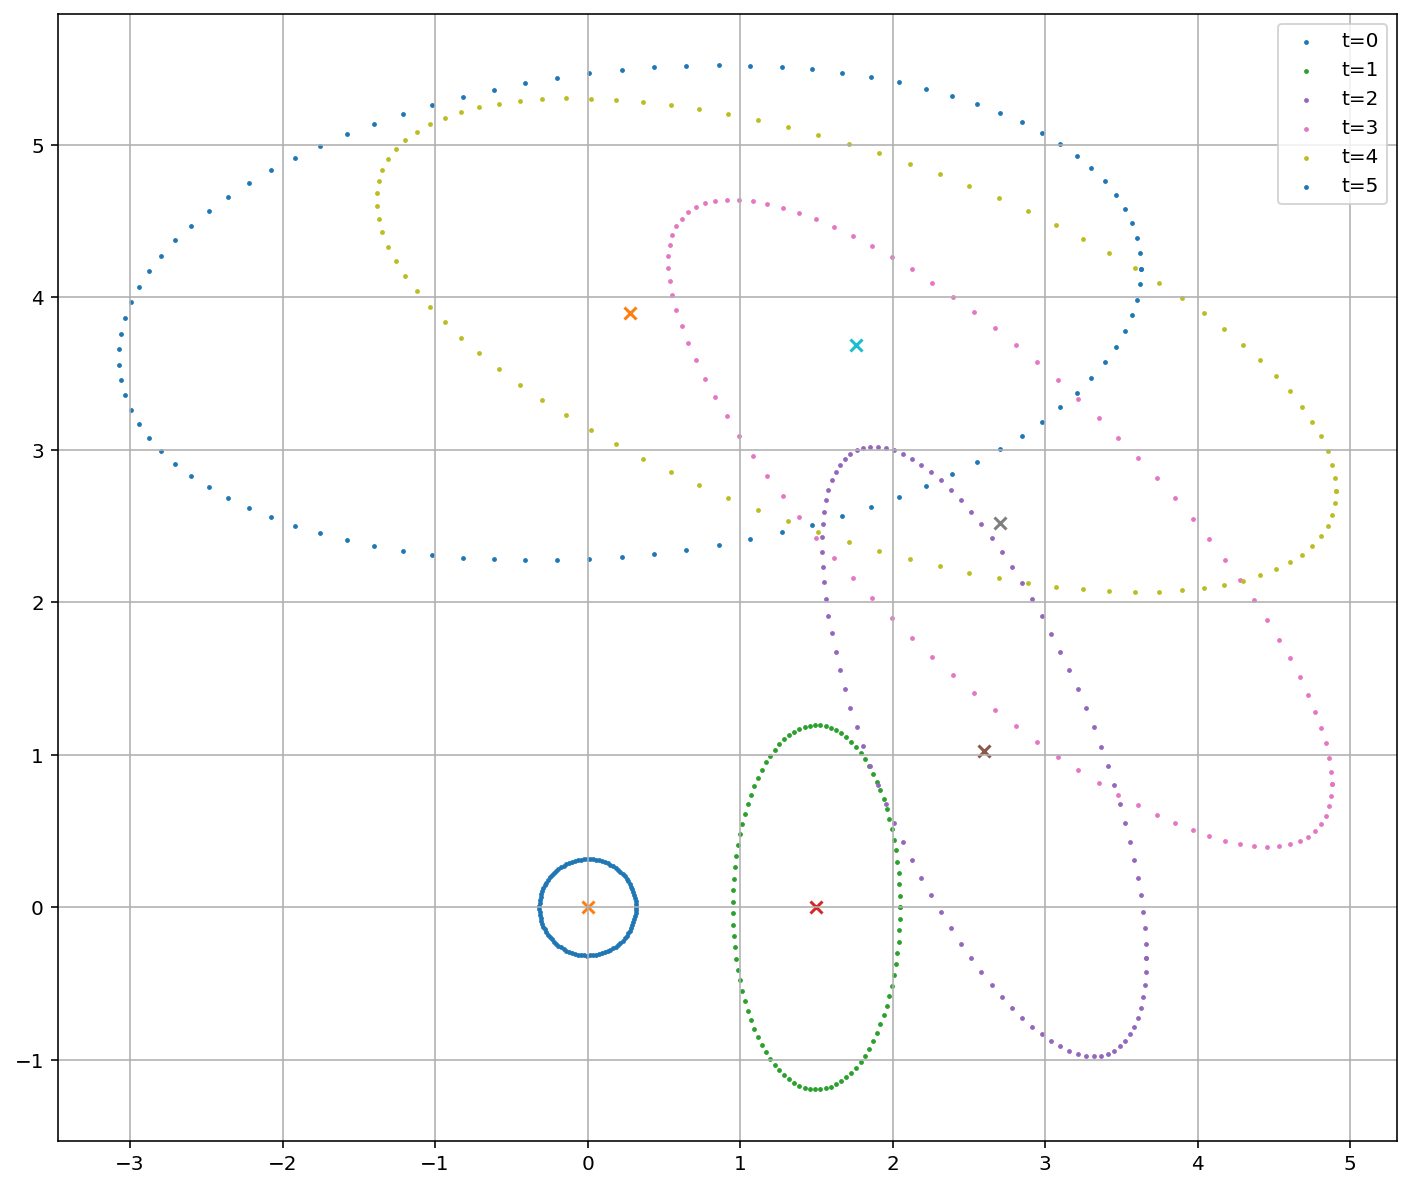

In [22]:
mean = np.array([0, 0, 0])
cov = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])
mean_noise = np.array([0, 0, 0])
cov_noise = [[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.1]]
u = np.array([3, 1.5])

delta = 0.5
A = np.eye(3)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')
for t in range(6):
    plot2cov(mean[:2], cov[:2,:2], ax=ax, label=f't={t}', k=1, s=2, n_pts=100)
    ax.scatter(mean[0], mean[1], marker='x')
    theta = mean[2]
    v = u[0]
    B = delta * np.array([[np.cos(theta), 0],
                          [np.sin(theta), 0],
                          [0, 1]])
    J = np.array([[1, 0, -np.sin(theta) * v * delta],
                  [0, 1,  np.cos(theta) * v * delta],
                  [0, 0,  1]])
    mean = A @ mean + B @ u + mean_noise
    cov  = J @ cov @ J.T + cov_noise
plt.grid()
plt.legend();

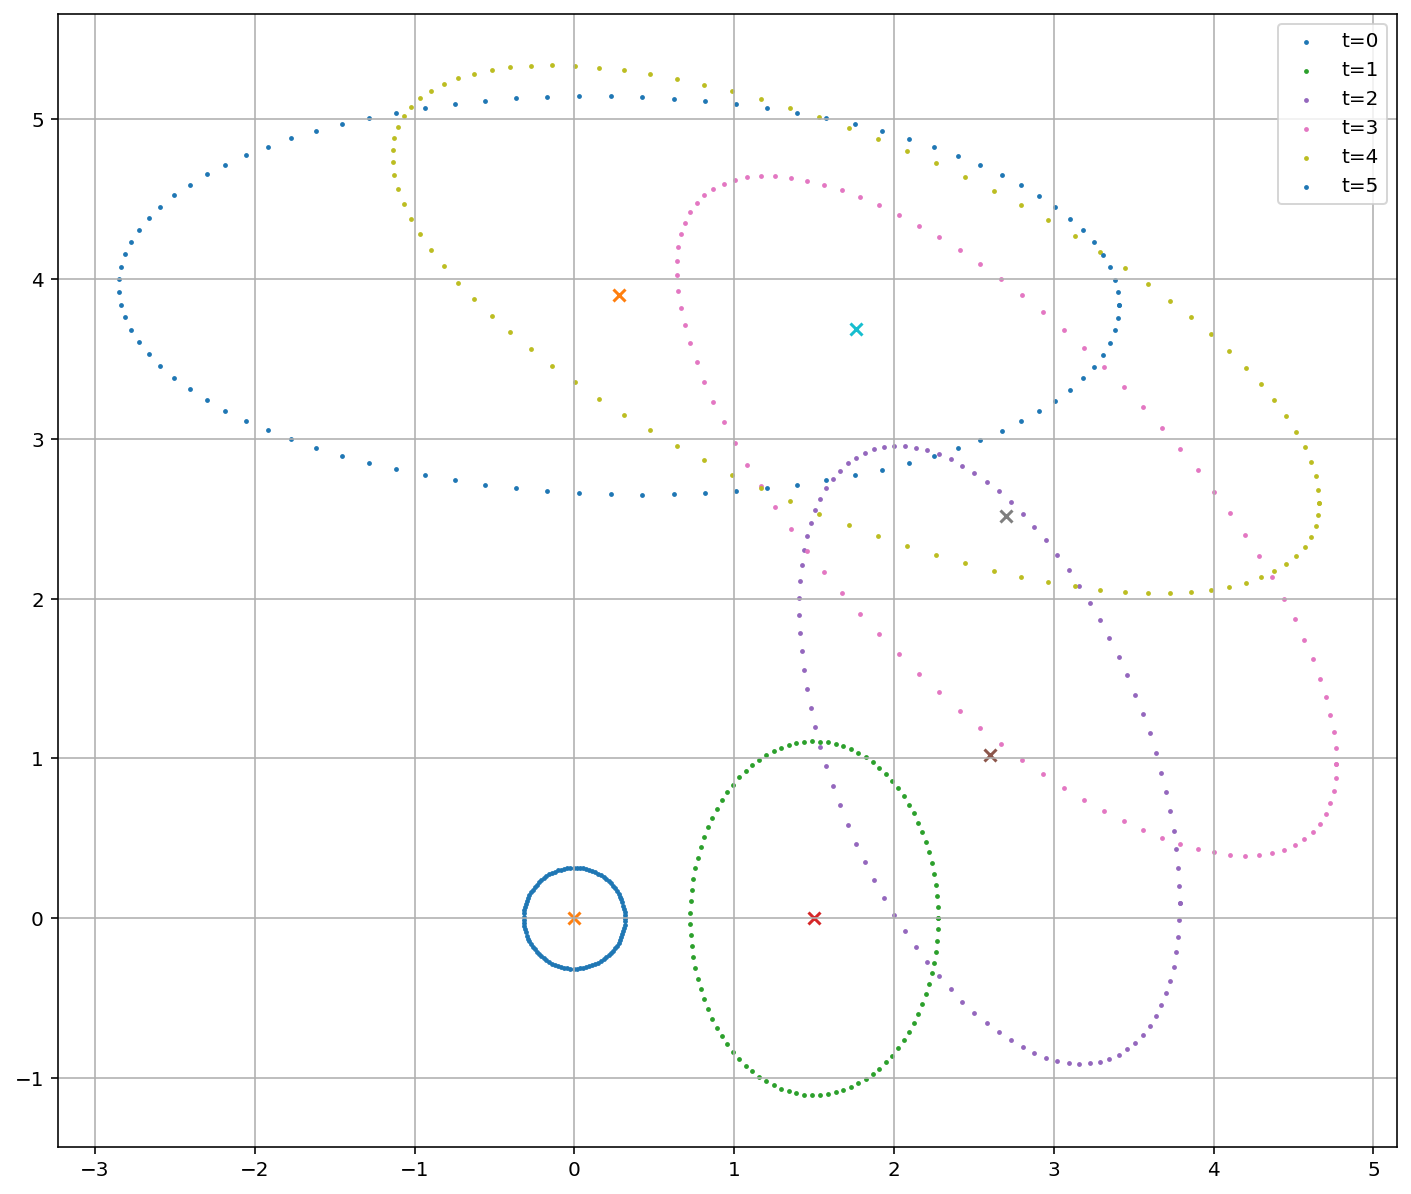

In [23]:
mean = [0, 0, 0]
cov = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])
mean_noise = np.array([0, 0])
cov_noise = np.array([[2, 0], [0, 0.1]])
u = np.array([3, 1.5])

delta = 0.5
A = np.eye(3)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')
for t in range(6):
    plot2cov(mean[:2], cov[:2,:2], ax=ax, label=f't={t}', k=1, s=2, n_pts=100)
    ax.scatter(mean[0], mean[1], marker='x')
    theta = mean[2]
    v = u[0]
    B = delta * np.array([[np.cos(theta), 0],
                          [np.sin(theta), 0],
                          [0, 1]])
    J = np.array([[1, 0, -np.sin(theta) * v * delta],
                  [0, 1,  np.cos(theta) * v * delta],
                  [0, 0,  1]])
    mean = A @ mean + B @ (u + mean_noise)
    cov  = J @ cov @ J.T + B @ cov_noise @ B.T
plt.grid()
plt.legend();

In both cases platform moves forward and turns left according to control vector $u$. Expected values on each step are the same. Noise in control sequence (3.E) has more variance along $y$, and noise in state space (3.D) - more variance along $x$.